# Pre-requisite

- Create the analysis environment using the `conda` and the shared `environment.txt` file
- Use the following command for the same 



```
conda create -n new analysis --file environment.txt
```


### Importing libraries for the analysis


In [57]:

import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns   
from scipy import stats
%matplotlib inline 



### Reading in the data from the `csv` sources

#### `application_data.csv`


In [58]:
application_data=pd.read_csv("../data/raw/application_data.csv")
application_data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### The shape of `application_data` csv

In [60]:
application_data.shape




(307511, 122)

#### The columns in the `application_data` csv


In [61]:
application_data.columns.values


array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',



#### General `info()` of the `application_data`



In [62]:
application_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### Using the `describe()` on the `application_data` to get a general sense of numerical columns


In [63]:
application_data.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### Reading in the  `previous_application.csv` data


In [64]:
previous_application=pd.read_csv("../data/raw/previous_application.csv")
previous_application.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### The shape of `previous_application` csv

In [65]:
previous_application.shape




(1670214, 37)

#### The columns in the `previous_application` csv


In [66]:
previous_application.columns.values


array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)



#### General `info()` of the `previous_application`



In [67]:
previous_application.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

#### Using the `describe()` on the `previous_application` to get a general sense of numerical columns


In [ ]:
previous_application.describe()




# Data cleaning and manipulation


#### Feature Distribution

In [68]:
def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print("numerical_features:",numerical_features)
    

#### Categorical and Numerical features in `application_data.csv`

In [69]:
type_features(application_data)

 

categorical_features : Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
numerical_features: Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)


#### Categorical and Numerical features in `preivous_application.csv`


In [70]:
type_features(previous_application)


categorical_features : Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')



# DATA IMBALANCE

Only 91.9% of the total customer are repaying the loan. We need to get better insights from the data and see which categories of the customer are not able to pay back loan.

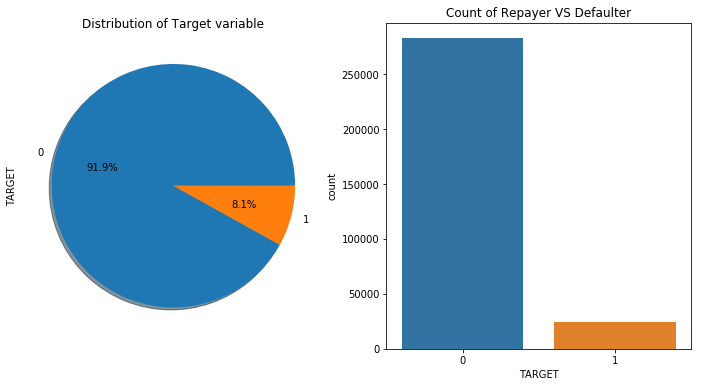

In [71]:
f,ax=plt.subplots(1,2,figsize=(12,6))
application_data.TARGET.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution of Target variable')
sns.countplot('TARGET',data=application_data,ax=ax[1])
ax[1].set_title('Count of Repayer VS Defaulter')
plt.show()

In [72]:
# function to analys missing values in a dataset

def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 40]
    f,ax =plt.subplots(figsize=(15,10))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by Cloumns>40%', fontsize=15)
    return ms


### Missing Value analysis for `application_data.csv`
Here in the plots it is showing columns which have more than 40% null/missing values in the dataset

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


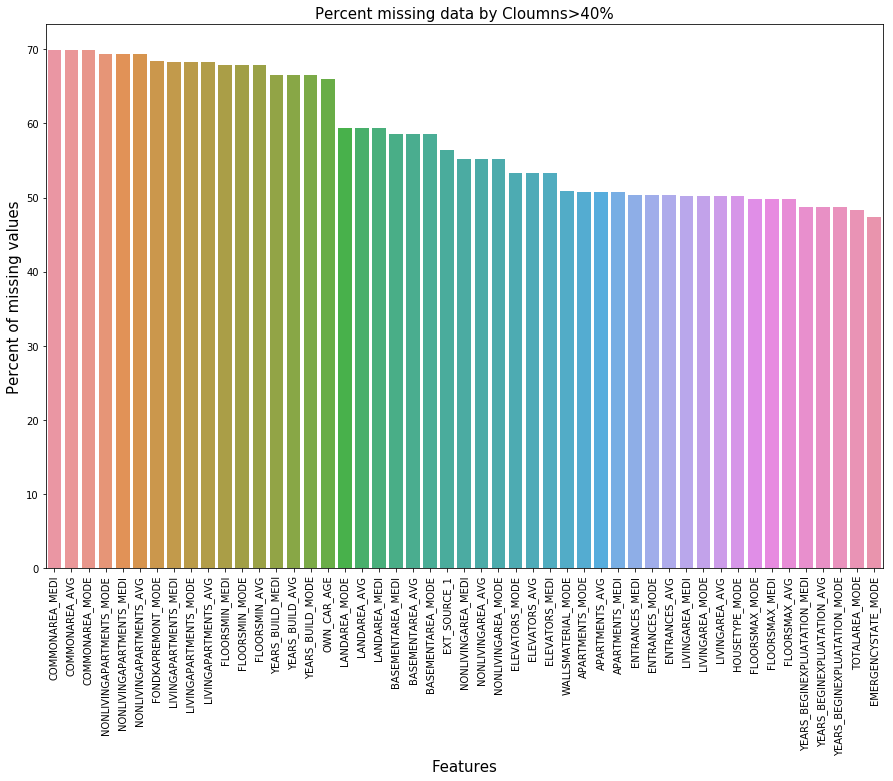

In [73]:
missingdata(application_data)

#below is the detils of the columns which has missing value more than 40% in application_data.
#We have two ways:
#1) Replace them with mean mode median but doing so will effect the dataset and could mislead the EDA.
#2) As the allowable missing value % is about more or less 40%.So we can keep the columns who has missing value less than 40%
#   and can drop them.

In [ ]:
# we are dropping the columns who have null values greater than 40%

#df.drop(['C', 'D'], axis = 1)



### Missing Value analysis for `previous_application.csv`

Here in the plots it is showing columns which have more than 40% null/missing values in the dataset


,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


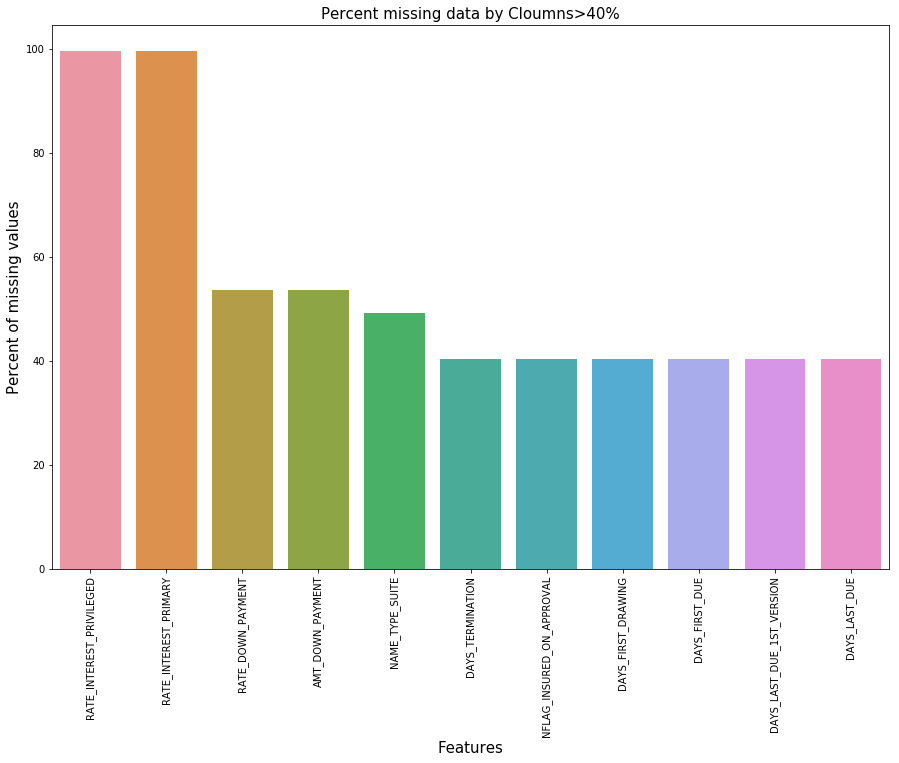

In [74]:
missingdata(previous_application)
#below is the deatils of the columns which has missing value more than 40% in application_data.
#We have two ways:
#1) Replace them with mean mode median but doing so will effect the dataset and could mislead the EDA.
#2) As the allowable missing value % is about more or less 40%.So we can keep the columns who has missing value less than 40%
#   and can drop them.



# OUTLIER REMOVAL - IQR method


## `application_data.csv`



#### Doing the IQR analysis to find the outliers in the dataset


In [75]:

application_data_numerical_values = application_data[application_data.select_dtypes(exclude = ["object"]).columns]
application_data_numerical_values.drop(['SK_ID_CURR'], axis=1, inplace=True)
application_data_numerical_values


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,202500.000,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,67500.000,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,135000.000,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,99000.000,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,0,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,-1213.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,0,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,-4597.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0,112500.000,1019610.0,33826.5,913500.0,0.018634,-20099,365243,-7427.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,0,0,135000.000,405000.0,20250.0,405000.0,0.019689,-14469,-2019,-14437.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN



#### First quantile


In [76]:
Q1 = application_data_numerical_values.quantile(0.25)
Q1



TARGET                              0.000000
CNT_CHILDREN                        0.000000
AMT_INCOME_TOTAL               112500.000000
AMT_CREDIT                     270000.000000
AMT_ANNUITY                     16524.000000
AMT_GOODS_PRICE                238500.000000
REGION_POPULATION_RELATIVE          0.010006
DAYS_BIRTH                     -19682.000000
DAYS_EMPLOYED                   -2760.000000
DAYS_REGISTRATION               -7479.500000
DAYS_ID_PUBLISH                 -4299.000000
OWN_CAR_AGE                         5.000000
FLAG_MOBIL                          1.000000
FLAG_EMP_PHONE                      1.000000
FLAG_WORK_PHONE                     0.000000
FLAG_CONT_MOBILE                    1.000000
FLAG_PHONE                          0.000000
FLAG_EMAIL                          0.000000
CNT_FAM_MEMBERS                     2.000000
REGION_RATING_CLIENT                2.000000
REGION_RATING_CLIENT_W_CITY         2.000000
HOUR_APPR_PROCESS_START            10.000000
REG_REGION


#### Third quantile


In [78]:
Q3 = application_data_numerical_values.quantile(0.75)
Q3

TARGET                              0.000000
CNT_CHILDREN                        1.000000
AMT_INCOME_TOTAL               202500.000000
AMT_CREDIT                     808650.000000
AMT_ANNUITY                     34596.000000
AMT_GOODS_PRICE                679500.000000
REGION_POPULATION_RELATIVE          0.028663
DAYS_BIRTH                     -12413.000000
DAYS_EMPLOYED                    -289.000000
DAYS_REGISTRATION               -2010.000000
DAYS_ID_PUBLISH                 -1720.000000
OWN_CAR_AGE                        15.000000
FLAG_MOBIL                          1.000000
FLAG_EMP_PHONE                      1.000000
FLAG_WORK_PHONE                     0.000000
FLAG_CONT_MOBILE                    1.000000
FLAG_PHONE                          1.000000
FLAG_EMAIL                          0.000000
CNT_FAM_MEMBERS                     3.000000
REGION_RATING_CLIENT                2.000000
REGION_RATING_CLIENT_W_CITY         2.000000
HOUR_APPR_PROCESS_START            14.000000
REG_REGION


#### Interquantile Range (IQR) in the `application_data.csv`


In [79]:
IQR = Q3 - Q1
IQR


TARGET                              0.000000
CNT_CHILDREN                        1.000000
AMT_INCOME_TOTAL                90000.000000
AMT_CREDIT                     538650.000000
AMT_ANNUITY                     18072.000000
AMT_GOODS_PRICE                441000.000000
REGION_POPULATION_RELATIVE          0.018657
DAYS_BIRTH                       7269.000000
DAYS_EMPLOYED                    2471.000000
DAYS_REGISTRATION                5469.500000
DAYS_ID_PUBLISH                  2579.000000
OWN_CAR_AGE                        10.000000
FLAG_MOBIL                          0.000000
FLAG_EMP_PHONE                      0.000000
FLAG_WORK_PHONE                     0.000000
FLAG_CONT_MOBILE                    0.000000
FLAG_PHONE                          1.000000
FLAG_EMAIL                          0.000000
CNT_FAM_MEMBERS                     1.000000
REGION_RATING_CLIENT                0.000000
REGION_RATING_CLIENT_W_CITY         0.000000
HOUR_APPR_PROCESS_START             4.000000
REG_REGION

In [80]:
z=(application_data_numerical_values < (Q1 - 1.5 * IQR)) | (application_data_numerical_values > (Q3 + 1.5 * IQR))
z


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
7,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Normalizing the `application_data.csv` 


In [83]:

application_data_normalized = application_data_numerical_values[~((application_data_numerical_values < (Q1 - 1.5 * IQR)) |(application_data_numerical_values > (Q3 + 1.5 * IQR))).any(axis=1)]
application_data_normalized


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,0,0,135000.0,405000.0,20250.0,405000.0,0.019689,-14469,-2019,-14437.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
13,0,1,225000.0,918468.0,28966.5,697500.0,0.016612,-14086,-3028,-643.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
20,0,0,135000.0,427500.0,21375.0,427500.0,0.015221,-18252,-4286,-298.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
25,0,0,90000.0,225000.0,11074.5,225000.0,0.028663,-19334,-3494,-2419.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
29,0,0,90000.0,180000.0,9000.0,180000.0,0.030755,-10341,-1010,-4799.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
34,0,0,135000.0,1125000.0,32895.0,1125000.0,0.019689,-15997,-4585,-5735.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
63,0,0,112500.0,95940.0,10462.5,90000.0,0.004960,-12240,-3720,-5246.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
66,0,0,180000.0,1035000.0,43983.0,1035000.0,0.028663,-19550,-4856,-6836.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
68,0,1,157500.0,450000.0,22500.0,450000.0,0.010966,-11956,-3154,-8118.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0


#### Shape of the normalized `application_data.csv`


In [81]:
application_data_normalized.shape



(26808, 105)


# Outlier detection and removal from the `previous_application.csv` dataset


In [ ]:

previous_application.head()


In [ ]:
previous_application_numerical_values = previous_application[previous_application.select_dtypes(exclude = ["object"]).columns]
previous_application_numerical_values.drop(['SK_ID_CURR', 'SK_ID_PREV'], axis=1, inplace=True)
previous_application_numerical_values.dropna(inplace=True)
previous_application_numerical_values



#### First quantile


In [ ]:
Q1 = previous_application_numerical_values.quantile(0.25)
Q1



#### Third quantile

In [ ]:
Q3 = previous_application_numerical_values.quantile(0.75)
Q3



#### Interquantile Range (IQR) in the `previous_application.csv`


In [ ]:

IQR = Q3 - Q1
IQR


In [ ]:
z=(previous_application_numerical_values < (Q1 - 1.5 * IQR)) |(previous_application_numerical_values > (Q3 + 1.5 * IQR))
z


In [ ]:

print(previous_application_numerical_values < (Q1 - 1.5 * IQR)) | (previous_application_numerical_values > (Q3 + 1.5 * IQR))


In [ ]:

previous_application_normalized = previous_application_numerical_values[~((previous_application_numerical_values < (Q1 - 1.5 * IQR)) |(previous_application_numerical_values > (Q3 + 1.5 * IQR))).any(axis=1)]
previous_application_normalized


In [ ]:
previous_application_normalized.shape









# Univariate analysis

### `application_data.csv`



#### Now we see the distribution of `numerical features`



- working with seaborn categorical plots


Doing an analysis on the `DAYS_BIRTH` variable

Now we need to segragate the age into groups of 

- 20-30
- 30-40
- 40-50
- 50-60


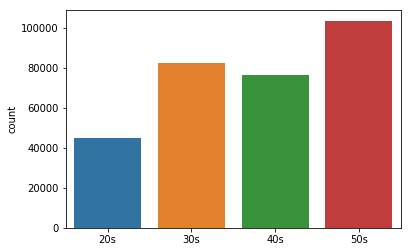

In [84]:
def classify_age(age):
    if (20<=age<30):
        return "20s"
    elif (30<=age<40):
        return "30s"
    elif (40<= age<50):
        return "40s"
    else:
        return "50s"
 
application_data['AGE'] = (application_data['DAYS_BIRTH'] / -365)

application_data['AGE_GROUP'] = application_data['AGE'].apply(lambda x: classify_age(x))

sns.countplot(sorted(application_data['AGE_GROUP']))


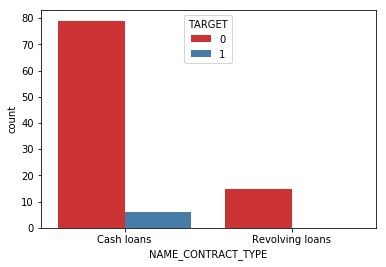

In [86]:

sns.countplot(data=application_data[:100], x='NAME_CONTRACT_TYPE', hue='TARGET',palette='Set1') 



# 002 Relationship between `TARGET` and `CODE_GENDER`



In [ ]:

sns.countplot(data=application_data[:100], x='CODE_GENDER', hue='TARGET',palette='Set1') 


In [ ]:

#sns.catplot(data=application_data[:100], x='TARGET',y='CODE_GENDER', kind="bar")


In [ ]:
#sns.barplot(data=application_data[:100], y='TARGET',x='CODE_GENDER',hue='NAME_CONTRACT_TYPE') 



# 003 Relationship between `TARGET`, `FLAG_OWN_CAR` and 'FLAG_OWN_REALTY`

TODO- need to combine these observations

In [ ]:
sns.countplot(data=application_data[:100], x='FLAG_OWN_CAR', hue='TARGET',palette='Set1') 


In [ ]:
 
sns.countplot(data=application_data[:100], x='FLAG_OWN_REALTY', hue='TARGET',palette='Set1') 



# 004 `TARGET` and `NAME_FAMILY_STATUS`


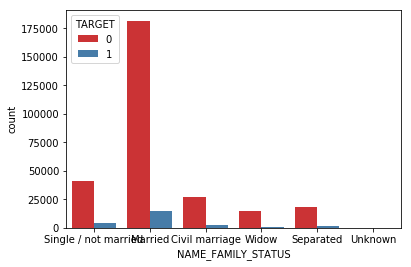

In [46]:
sns.countplot(data=application_data, x='NAME_FAMILY_STATUS', hue='TARGET',palette='Set1') 

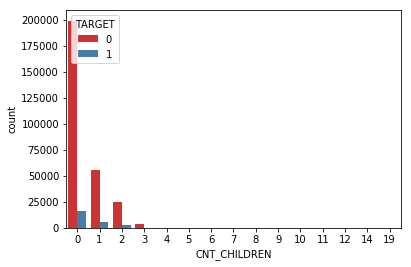

In [47]:
sns.countplot(data=application_data, x='CNT_CHILDREN', hue='TARGET', palette='Set1')

TODO INCOME needs to be converted into bins

In [ ]:
sns.countplot(data=application_data, y='AMT_INCOME_TOTAL', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='AMT_CREDIT', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='AMT_ANNUITY', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='AMT_GOODS_PRICE', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='NAME_TYPE_SUITE', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='NAME_INCOME_TYPE', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='NAME_EDUCATION_TYPE', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='NAME_FAMILY_STATUS', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, y='NAME_HOUSING_TYPE', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, y='REGION_POPULATION_RELATIVE', hue='TARGET', palette='Set1')



In [ ]:
sns.countplot(data=application_data, y='DAYS_EMPLOYED', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='DAYS_REGISTRATION', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='DAYS_ID_PUBLISH', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, y='OWN_CAR_AGE', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='FLAG_MOBIL', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='FLAG_EMP_PHONE', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='FLAG_WORK_PHONE', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='FLAG_CONT_MOBILE', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='FLAG_PHONE', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='FLAG_EMAIL', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, y='OCCUPATION_TYPE', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='CNT_FAM_MEMBERS', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='REGION_RATING_CLIENT', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='REGION_RATING_CLIENT_W_CITY', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, y='WEEKDAY_APPR_PROCESS_START', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='HOUR_APPR_PROCESS_START', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='REG_REGION_NOT_LIVE_REGION', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='REG_REGION_NOT_WORK_REGION', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='LIVE_REGION_NOT_WORK_REGION', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='REG_CITY_NOT_LIVE_CITY', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='REG_CITY_NOT_WORK_CITY', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, x='LIVE_CITY_NOT_WORK_CITY', hue='TARGET', palette='Set1')

In [ ]:
sns.countplot(data=application_data, y='ORGANIZATION_TYPE', hue='TARGET', palette='Set1')




In [ ]:

#### 

In [ ]:
f, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='ORGANIZATION_TYPE', data=application_data).set_title('count based on Organization type');
# Rotate x-labels
plt.xticks(rotation=-90)

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="ORGANIZATION_TYPE", hue='TARGET', 
              data=application_data).set_title('REpayer VS Defaulter based on Organization type')



# Bivariate analysis





#### Categorical Features

In [ ]:
def plot_re(df,t1='',t2=''):
    f,ax=plt.subplots(1,2,figsize=(10,6))
    df[[t1,t2]].groupby([t1]).count().plot.bar(ax=ax[0],color='Green')
    ax[0].set_title('count of customer Based on'+t1)
    sns.countplot(t1,hue=t2,data=df,ax=ax[1],palette="spring")
    ax[1].set_title(t1+': Repayer vs Defualter')
    # Rotate x-labels
    plt.xticks(rotation=-90)
    a=plt.show()
    return a

In [ ]:
plot_re(application_data,'NAME_EDUCATION_TYPE','TARGET')

Secondary/secondary special is not able to pay the loan

Gender Analysis

In [ ]:
plot_re(application_data,'CODE_GENDER','TARGET')

Female has high count and not able to pay the loan back

Analysis based on income type

In [ ]:
plot_re(application_data,'NAME_INCOME_TYPE','TARGET')

Working has high count and not able to repay the loan as compared to others

In [ ]:
plot_re(application_data,'OCCUPATION_TYPE','TARGET')

Laborers are high in number

In [ ]:
plot_re(application_data,'NAME_FAMILY_STATUS','TARGET')

Married are not able to pay the loans

In [ ]:
plot_re(application_data,'NAME_HOUSING_TYPE','TARGET')

House/Apartments have high count

In [ ]:
plot_re(application_data,'NAME_TYPE_SUITE','TARGET')

Unacompanied customer are very much lijkely to be defaulter

Oraganization type


Bussiness type 3 is the deafaulter

In [ ]:
plot_re(application_data,'FLAG_OWN_CAR','TARGET')

In [ ]:
plot_re(application_data,'FLAG_OWN_REALTY','TARGET')

In [ ]:
plot_re(application_data,'NAME_CONTRACT_TYPE','TARGET')

In [ ]:
plot_re(application_data,'WEEKDAY_APPR_PROCESS_START','TARGET')

In [ ]:
plot_re(application_data,'HOUSETYPE_MODE','TARGET')

Customers on locks of flat are more likely to be defaulter

In [ ]:
plot_re(application_data,'EMERGENCYSTATE_MODE','TARGET')

CHILDREN COUNT

In [ ]:
sns.set_style('whitegrid')
f, ax = plt.subplots(3,1,figsize=(20,15))

sns.countplot(x='CNT_CHILDREN', data=application_data, ax=ax[0]).set_title('count of number of childern client has');

sns.countplot("CNT_CHILDREN", hue='TARGET', 
              data=application_data,ax=ax[1]).set_title('REpayer VS Defaulter based on CNT_CHILDREN')

ax[2]=sns.kdeplot(application_data.loc[(application_data['TARGET'] == 0),'CNT_CHILDREN'] ,label='NON-PAYERS')
ax[2]=sns.kdeplot(application_data.loc[(application_data['TARGET'] == 1),'CNT_CHILDREN'],label='REPAYERS')
ax[2].set_title('Children count Distribution - Repayer V.S. Non Repayers')


In [ ]:
f, ax = plt.subplots(2,2, figsize=(15, 10))
sns.distplot(application_data.AMT_ANNUITY.dropna(), kde=True, ax=ax[0,0]).set_title('customer Amount Annual income Distribution')
sns.distplot(application_data.AMT_CREDIT.dropna(), kde=True, ax=ax[0,1]).set_title('customer Amount credit Distribution')
sns.distplot(application_data.AMT_GOODS_PRICE.dropna(), kde=True, ax=ax[1,0]).set_title('customer GOOD PRICE Distribution')
sns.distplot(application_data.AMT_INCOME_TOTAL.dropna(), kde=True, ax=ax[1,1]).set_title('customer Amount Annual income Distribution')

In [ ]:
sns.set_style('whitegrid')
f, ax = plt.subplots(2,2, figsize=(15, 10))

# Graph amt annutiy Satisfaction
sns.distplot(application_data.DAYS_BIRTH.dropna(), kde=True, ax=ax[0,0]).set_title('customer Days birth Distribution')

sns.distplot(application_data.DAYS_EMPLOYED.dropna(), kde=True,  ax=ax[0,1]).set_title('customer Employed Distribution')

sns.distplot(application_data.DAYS_ID_PUBLISH.dropna(), kde=True, ax=ax[1,0]).set_title('customer ID Publish Distribution')


sns.distplot(application_data.DAYS_REGISTRATION.dropna(), kde=True, ax=ax[1,1]).set_title('customer Days of Registration Distribution')

# Based on region and city

In [ ]:
visual_dat= ['REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']


for i in visual_dat:
    plt.figure(figsize = (10,5))
    plt.subplot(1,3,1)
    sns.countplot(application_data[i])
    plt.subplot(1,3,2)
    sns.countplot(application_data[i],hue=application_data['TARGET'],palette="spring")
    plt.subplot(1,3,3)
    sns.distplot(application_data[i],bins= 20) 
    plt.title(i)
    plt.xticks(rotation=-45)
    plt.show()

Analysis based on EXT_SOURCE

In [ ]:
f, ax = plt.subplots(ncols=3,figsize=(10, 5))


sns.distplot(application_data.EXT_SOURCE_1.dropna(), kde=True,ax=ax[0]).set_title('EXT source 1 Distribution')



sns.distplot(application_data.EXT_SOURCE_2.dropna(), kde=True,ax=ax[1]).set_title(' EXT Source 2 Distribution')

 
sns.distplot(application_data.EXT_SOURCE_3.dropna(), kde=True, ax=ax[2]).set_title('EXt Source 3 Distribution')

In [ ]:
val_p=['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG']
for i in val_p:
    plt.figure(figsize = (5,5))
    sns.distplot(application_data[i].dropna(), kde=True)        
    plt.title(i)
    plt.xticks(rotation=-45)
    plt.show()










# Derived metrics 

Here, we derive some new columns based on our understanding of the domain



# Multivariate analysis



Checking the Correlation Between The Features for Application_data



In [ ]:
corrmat = application_data.corr()
top_corr_features = corrmat.index[abs(corrmat["TARGET"])>=0.03]
plt.figure(figsize=(20,10))
g = sns.heatmap(application_data[top_corr_features].corr(),annot=True)


By see above corelation plot we can find out the most corelated featuers along with they corelated values. (needs improvemet in heat map)


and all kind of analysis are done for the application_data




# Conclusion



#### Top 5 `driver variables` which can help us predict whether a custumor might default or now.

- Employment length
- Purpose of loan

